In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-fraud-detection/credit_card_fraud_dataset.csv


In [2]:
df = pd.read_csv("/kaggle/input/credit-card-fraud-detection/credit_card_fraud_dataset.csv")

In [3]:
df.head()

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0


In [4]:
df[(df.IsFraud==1)]

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
190,191,2024-09-07 18:24:35.463748,1703.80,916,purchase,San Jose,1
191,192,2024-04-27 01:48:35.463751,4248.10,862,purchase,San Jose,1
208,209,2023-11-05 01:05:35.463826,1641.32,826,purchase,San Jose,1
319,320,2024-06-16 18:30:35.464289,281.18,237,purchase,Philadelphia,1
370,371,2023-10-29 04:09:35.464522,3047.66,789,purchase,New York,1
...,...,...,...,...,...,...,...
99392,99393,2024-06-05 00:58:36.024971,3358.10,286,purchase,Chicago,1
99607,99608,2023-10-27 08:34:36.026018,564.19,454,purchase,Phoenix,1
99614,99615,2023-11-21 04:18:36.026049,4083.63,514,purchase,Philadelphia,1
99725,99726,2024-08-30 04:40:36.026481,3825.68,15,refund,Los Angeles,1


In [5]:
df.isnull().sum()

TransactionID      0
TransactionDate    0
Amount             0
MerchantID         0
TransactionType    0
Location           0
IsFraud            0
dtype: int64

In [6]:
df1=df.drop(columns=['TransactionID'])

In [7]:
df1

,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0
...,...,...,...,...,...,...
99995,2024-06-07 00:57:36.027591,1057.29,289,refund,San Antonio,0
99996,2023-10-22 23:12:36.027594,297.25,745,refund,San Antonio,0
99997,2024-05-31 19:27:36.027597,3448.56,690,purchase,San Antonio,0
99998,2024-10-18 09:43:36.027601,3750.79,644,purchase,Philadelphia,0


## TOP MERCHANTS WITH HIGHEST FRAUDS 

<Axes: xlabel='MerchantID', ylabel='IsFraud'>

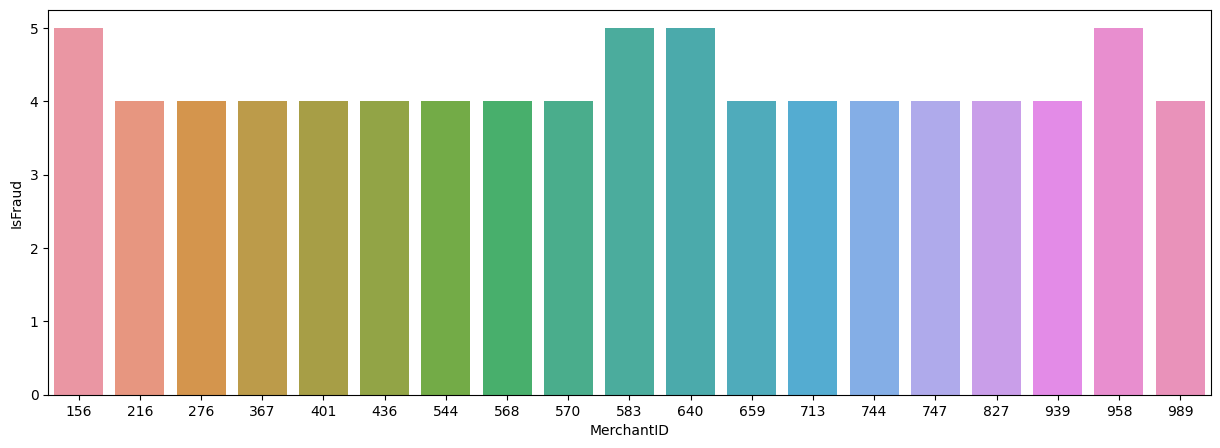

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns
df2=df1.groupby(['MerchantID']).agg({"IsFraud":"sum"}).reset_index().sort_values(by='IsFraud',ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(x='MerchantID',y='IsFraud',data=df2[df2.IsFraud>=4])

## TOP LOCATIONS WHERE FRAUD IS MORE IN NUMBER

<Axes: xlabel='Location', ylabel='IsFraud'>

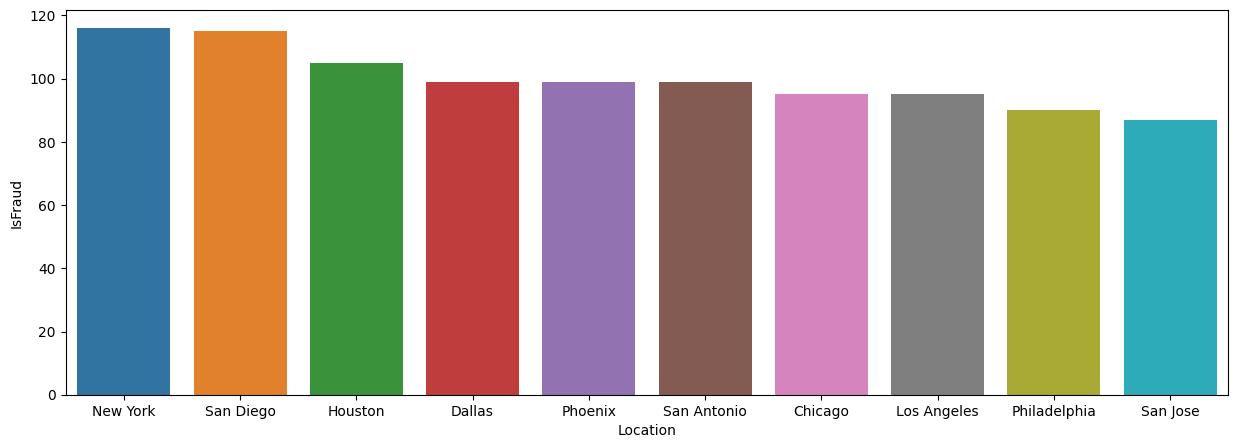

In [9]:
df2=df1.groupby(['Location']).agg({"IsFraud":"sum"}).reset_index().sort_values(by='IsFraud',ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(x='Location',y='IsFraud',data=df2[df2.IsFraud>=4])


## LOCATIONS WITH LEAST FRAUDS

<Axes: xlabel='Location', ylabel='IsFraud'>

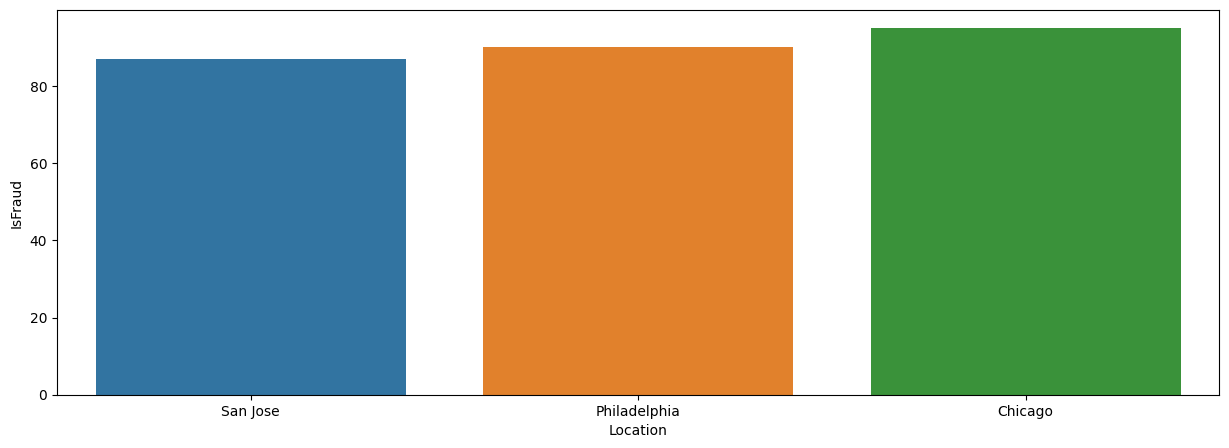

In [10]:
df2=df1.groupby(['Location']).agg({"IsFraud":"sum"}).reset_index().sort_values(by='IsFraud',ascending=True)
plt.figure(figsize=(15,5))
sns.barplot(x='Location',y='IsFraud',data=df2.head(3))


## AVG AMOUNT THAT IS FLAGGED AS FRAUD

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

<Axes: xlabel='IsFraud', ylabel='Amount'>

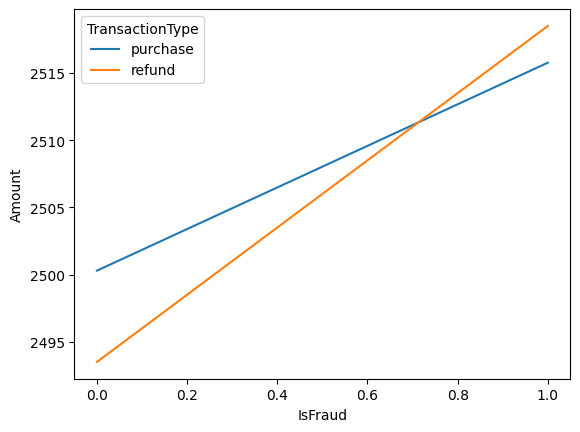

In [11]:
df2=df1.groupby(['IsFraud','TransactionType']).agg({"Amount":"mean"}).reset_index()
sns.lineplot(x='IsFraud',y='Amount',data=df2,hue='TransactionType')


### Inference:
1. Few merchants are known to commit fraudalant transactions
2. Frauds happen more in New York, San Diego,Houston while lesser in Sanjose, Philadelphia and Chicago
3. Mean amount marked as fraudalent is more than 2515 for purchase as well as for refund. Where as amount around 2400 is not marked as fraud


## Data Transformations and Predictions

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [13]:
df1.head()

,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0


#### We will take Amount,MerchantID,TransactionType,Location as Features whereas IsFraud as Target Variable

In [14]:
features=['Amount','MerchantID','TransactionType','Location']
target='IsFraud'


In [15]:
X=df1[features]
y=df[target]
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.25,random_state=42)
transformer = ColumnTransformer(
    [
       ("encoder",OneHotEncoder(),['TransactionType','Location'])
    ]
)

In [16]:
X_train_transformed = transformer.fit_transform(X_train)

In [17]:
X_test_transformed = transformer.transform(X_test)

In [18]:
models ={"randomForest":RandomForestClassifier(),
        "DecisionTree":DecisionTreeClassifier(),
        "XGBClassifier":XGBClassifier(),
        "LogisticRegression":LogisticRegression()   
        }

In [19]:
accuracies=[]
for name,model in models.items():
    model.fit(X_train_transformed,Y_train)
    ypred = model.predict(X_test_transformed)
    accuracies.append({"Model":name,"Accuracy":accuracy_score(Y_test,ypred)})
    

In [20]:
accuracies

[{'Model': 'randomForest', 'Accuracy': 0.98956},
 {'Model': 'DecisionTree', 'Accuracy': 0.98956},
 {'Model': 'XGBClassifier', 'Accuracy': 0.98956},
 {'Model': 'LogisticRegression', 'Accuracy': 0.98956}]

In [21]:
print(classification_report(Y_test,ypred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     24739
           1       0.00      0.00      0.00       261

    accuracy                           0.99     25000
   macro avg       0.49      0.50      0.50     25000
weighted avg       0.98      0.99      0.98     25000



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
confusion_matrix(Y_test,ypred)

array([[24739,     0],
       [  261,     0]])